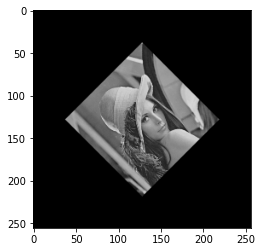

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

lenna=cv2.imread('lenna_gray_256x256.bmp')
rows,cols=lenna.shape[0:2]

m45= cv2.getRotationMatrix2D((cols/2,rows/2),45,0.5) 
# 회전축:중앙, 각도:45, 배율:0.5
img45=cv2.warpAffine(img,m45,(cols,rows))

# cv2.imshow('rotate_lenna',img45)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img45)
plt.show()

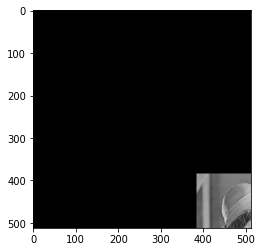

In [139]:
def padding(img, set_size):
    h,w,c = img.shape

    if max(h, w) > set_size:
        return img

    delta_w = set_size - w
    delta_h = set_size - h
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    new_img = cv2.copyMakeBorder(img, top, bottom,
                                 left, right, cv2.BORDER_CONSTANT,
                                 value=[0, 0, 0])

    return new_img

img1 = padding(lenna, 512)
rows1,cols1=img1.shape[0:2]

translation_matrix = np.float32([[1,0,256],[0,1,256]])
img_translation = cv2.warpAffine(img1,translation_matrix,
                                 (rows1,cols1),cv2.INTER_LINEAR)

plt.imshow(img_translation)
plt.show()

# Hough Transform

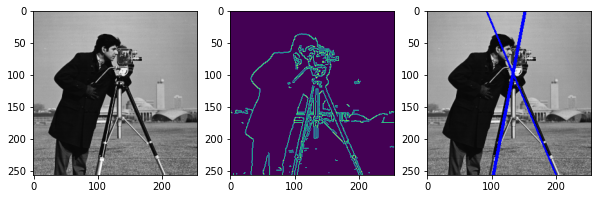

In [93]:
img = cv2.imread('cameraman.bmp')
img_original = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,200,300,apertureSize=3)

lines = cv2.HoughLines(edges,1,np.pi/180,100)

for line in lines:
    rho, theta=line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0+1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 -1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img_original)
plt.subplot(1,3,2)
plt.imshow(edges)
plt.subplot(1,3,3)
plt.imshow(img)

plt.show()

# Image Morphology

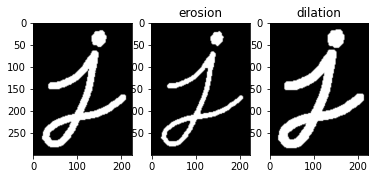

In [100]:
img=cv2.imread('j.bmp')

kernel=np.ones((5,5),np.uint8)
erosion=cv2.erode(img,kernel,iterations=1)
dilation=cv2.dilate(img,kernel,iterations=1)

plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.title("erosion")
plt.imshow(erosion)
plt.subplot(1,3,3)
plt.title("dilation")
plt.imshow(dilation)
plt.show()

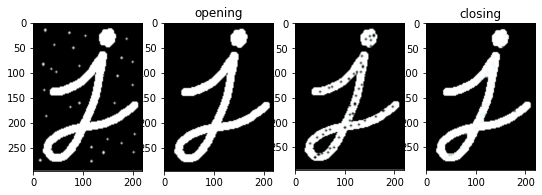

In [141]:
o=cv2.imread('j_for_opening.bmp')
c=cv2.imread('j_for_closing.bmp')

kernel=np.ones((6,6),np.uint8)
opening=cv2.morphologyEx(o,cv2.MORPH_OPEN,kernel)
closing=cv2.morphologyEx(c,cv2.MORPH_CLOSE,kernel)

plt.figure(figsize=(9,9))
plt.subplot(1,4,1)
plt.imshow(o)
plt.subplot(1,4,2)
plt.title("opening")
plt.imshow(opening)
plt.subplot(1,4,3)
plt.imshow(c)
plt.subplot(1,4,4)
plt.title("closing")
plt.imshow(closing)
plt.show()